In [1]:
import stata_setup
# If Windows 'uncomment' the following line
#stata_setup.config("C:/Program Files/Stata17/", "mp")

# If Linux 'uncomment' the following line
stata_setup.config("/usr/local/stata17/", "mp")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 4-core  perpetual
Serial number: 501706303466
  Licensed to: David Tomas Jacho-Chavez
               Emory University

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


### Example: Labor Force Participation of Married Women

Let $inlf$ ("in the labor force") be a binary variable indicating labor force participation by a married woman during 1975: $inlf=1$ if the woman reports working for a wage outside the home at some point during the year, and zero otherwise. We assume that labor force participation depends on other sources of income, including husband's earnings ($nwifeinc$, measured in thousands of dollars), years of education ($educ$), past years of labor market experience ($exper$), $age$, number of children less than six years old ($kidslt6$), and number of kids between 6 and 18 years of age ($kidsge6$)

In [2]:
%%stata
use "http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta", clear
list inlf nwifeinc educ exper age kidslt6 kidsge6 in 426/431, clean 


. use "http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta", clear

. list inlf nwifeinc educ exper age kidslt6 kidsge6 in 426/431, clean 

       inlf   nwifeinc   educ   exper   age   kidslt6   kidsge6  
426.      1   21.64008     13      22    43         0         2  
427.      1   23.99998     12      14    33         0         1  
428.      1   16.00002     12       7    30         0         1  
429.      0     21.025     12       2    49         0         1  
430.      0       23.6     16       5    30         2         0  
431.      0       22.8     12      12    30         1         0  

. 


<ins>Specification</ins>:

$\text{Pr}[inlf=1|nwinfeninc,educ,exper,age,kidslt6,kidsge6]=G(\beta_1 nwinfeninc + \beta_2 educ + \beta_3 exper + \beta_4 exper^2 + \beta_5 age + \beta_6 kidslt6 + \beta_7 kidsge6 + \beta_8)$

We now estimate the Linear Probability Model (LPM), the Probit (Probit) model, and the Logit (Logit) model with _robust_ standard errors:

In [3]:
from pystata import stata
stata.run('quietly: collect _r_b _r_se _r_p, tag(model[LPM (OLS)]): reg inlf nwifeinc educ exper c.exper#c.exper age kidslt6 kidsge6, robust')
stata.run('quietly: collect _r_b _r_se _r_p, tag(model[Probit (MLE)]): probit inlf nwifeinc educ exper c.exper#c.exper age kidslt6 kidsge6, robust')
stata.run('quietly: collect _r_b _r_se _r_p, tag(model[Logit (MLE)]): logit inlf nwifeinc educ exper c.exper#c.exper age kidslt6 kidsge6, robust')

In [4]:
stata.run('collect style cell, nformat(%5.3f)')
stata.run('collect style cell border_block, border(right, pattern(nil))')
stata.run('collect style cell result[_r_se], sformat("(%s)")')
stata.run('collect style header result, level(hide)')
stata.run('collect style column, extraspace(1)')
stata.run('collect style row stack, spacer delimiter(" x ")')
stata.run('collect recode colname c.exper#c.exper = exper^2')
stata.run('collect recode colname _cons = Constant')


(25 items recoded in collection default)
(24 items recoded in collection default)


In [5]:
%%stata
collect layout (colname#result) (model)


Collection: default
      Rows: colname#result
   Columns: model
   Table 1: 31 x 3

------------------------------------------------
          LPM (OLS)   Probit (MLE)   Logit (MLE)
------------------------------------------------
nwifeinc     -0.003         -0.012        -0.021
            (0.002)        (0.005)       (0.009)
              0.026          0.024         0.019
                                                
educ          0.038          0.131         0.221
            (0.007)        (0.026)       (0.044)
              0.000          0.000         0.000
                                                
exper         0.039          0.123         0.206
            (0.006)        (0.019)       (0.032)
              0.000          0.000         0.000
                                                
exper^2      -0.001         -0.002        -0.003
            (0.000)        (0.001)       (0.001)
              0.002          0.002         0.002
                                

## Marginal Effects

In [6]:
%%stata
quietly logit inlf nwifeinc educ exper c.exper#c.exper age kidslt6 kidsge6, robust
#delimit ;
quietly margins, dydx(educ) at(educ=(5(1)17) kidsge6=0 kidslt6=(0(1)3)
                               (mean) nwifeinc exper age) saving(predictions, replace);
#delimit cr


. quietly logit inlf nwifeinc educ exper c.exper#c.exper age kidslt6 kidsge6, r
> obust

. #delimit ;
delimiter now ;
. quietly margins, dydx(educ) at(educ=(5(1)17) kidsge6=0 kidslt6=(0(1)3)
>                                (mean) nwifeinc exper age) saving(predictions,
>  replace);

. #delimit cr
delimiter now cr
. 


## _Average_ Marginal Effects

In [7]:
%%stata
quietly logit inlf nwifeinc educ exper c.exper#c.exper age kidslt6 kidsge6, robust
margins, dydx(*)


. quietly logit inlf nwifeinc educ exper c.exper#c.exper age kidslt6 kidsge6, r
> obust

. margins, dydx(*)

Average marginal effects                                   Number of obs = 753
Model VCE: Robust

Expression: Pr(inlf), predict()
dy/dx wrt:  nwifeinc educ exper age kidslt6 kidsge6

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
    nwifeinc |  -.0038118   .0015923    -2.39   0.017    -.0069327   -.0006909
        educ |   .0394965   .0074931     5.27   0.000     .0248103    .0541827
       exper |   .0254254   .0022683    11.21   0.000     .0209797    .0298712
         age |  -.0157194   .0023861    -6.59   0.000     -.020396   -.0110427
     kidslt6 |  -.2577537   .0323592    -7.97   0.000    -.3211766   -.1943307
     kidsge6 |   .0107348   .0142388

### Visualizing Marginal Effects

In [8]:
%%stata
use predictions, clear
rename _at2 educ
rename _at5 kidslt6
rename _margin pr_inlf
save predictions, replace


. use predictions, clear
(Created by command margins; also see char list)

. rename _at2 educ

. rename _at5 kidslt6

. rename _margin pr_inlf

. save predictions, replace
file predictions.dta saved

. 


In [9]:
# Import the necessary Python packages
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('WebAgg')
import matplotlib.pyplot as plt


# Read (import) the Stata dataset “predictions.dta”
# into a pandas data frame named “data”
data = pd.read_stata("predictions.dta")


# Define a 3-D graph named “ax”
ax = plt.axes(projection='3d')

# Specify the view angle of the graph
ax.view_init(elev=30, azim=240)

# Render the graph
ax.plot_trisurf(data['educ'], data['kidslt6'], data['pr_inlf'],cmap=plt.cm.Spectral_r)

# Specify the axis ticks
ax.set_xticks(np.arange(5, 17, step=2))
ax.set_yticks(np.arange(0, 3, step=1))
ax.set_zticks(np.arange( 0, 0.1, step=0.02))


# Specify the title and axis titles
ax.set_title("")
ax.set_xlabel("Education (years)")
ax.set_ylabel("Kids<6 (number)")
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$\widehat{\delta}_{educ}$", rotation=90)

# Save the graph
plt.savefig("Margins3d.png")

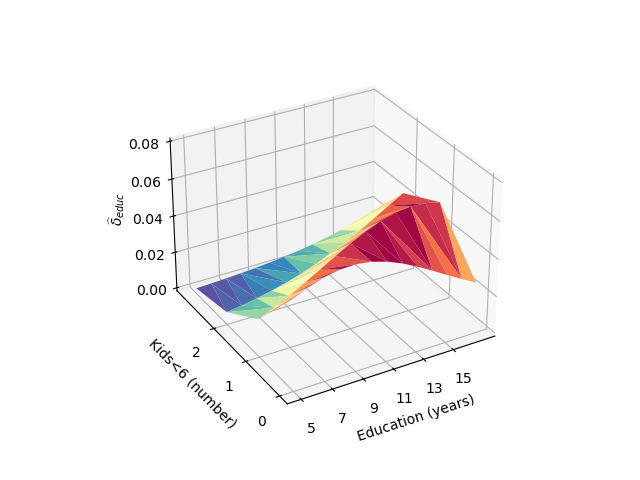

In [10]:
# Showing the graph
from IPython.display import Image
Image("Margins3d.png")